# Car Price Prediction using Machine Learning

### Importing necessary modules

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

### Loading the data

Dataset: [Link](https://www.canva.com/link?target=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fvijayaadithyanvg%2Fcar-price-predictionused-cars&design=DAFSZMvBiCI&accessRole=viewer&linkSource=document)

In [27]:
df = pd.read_csv("car_data.csv")

In [28]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [30]:
df.shape

(301, 9)

In [31]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [32]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [33]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [34]:
df.value_counts()

Car_Name           Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer        Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer        Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual    Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer        Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer        Manual        0        1
                                                                                                                  ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual    Manual        0        1
                         0.48           0.84           23000       Pe

In [35]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [36]:
df.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [37]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [38]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [39]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

### Data Visualization for EDA

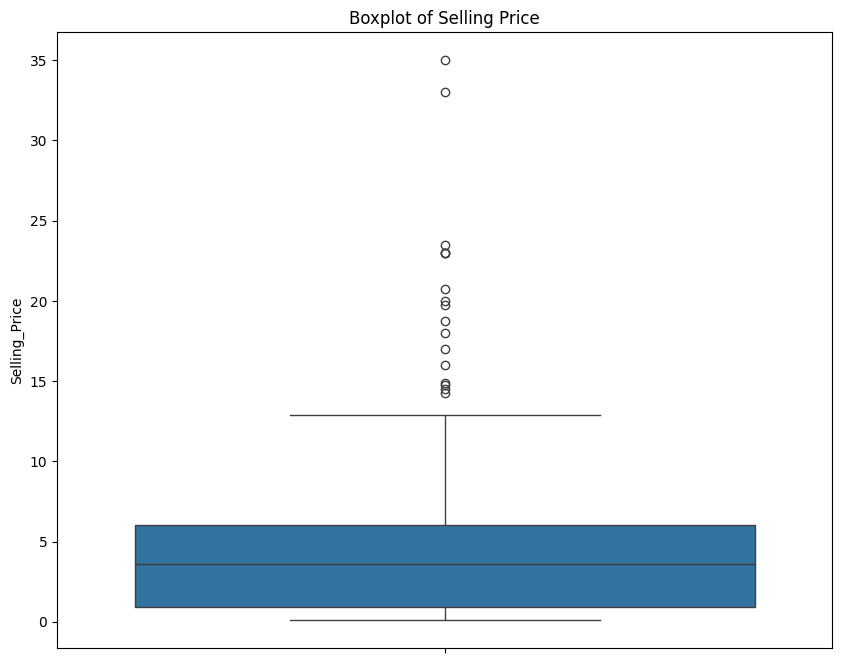

In [40]:
plt.figure(figsize=(10,8))

sns.boxplot(df['Selling_Price'])
plt.title('Boxplot of Selling Price')
plt.show()

In [45]:
numerical_columns = ['Year','Selling_Price','Present_Price','Driven_kms','Owner']
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()

correlation_matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [46]:
numerical_df

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


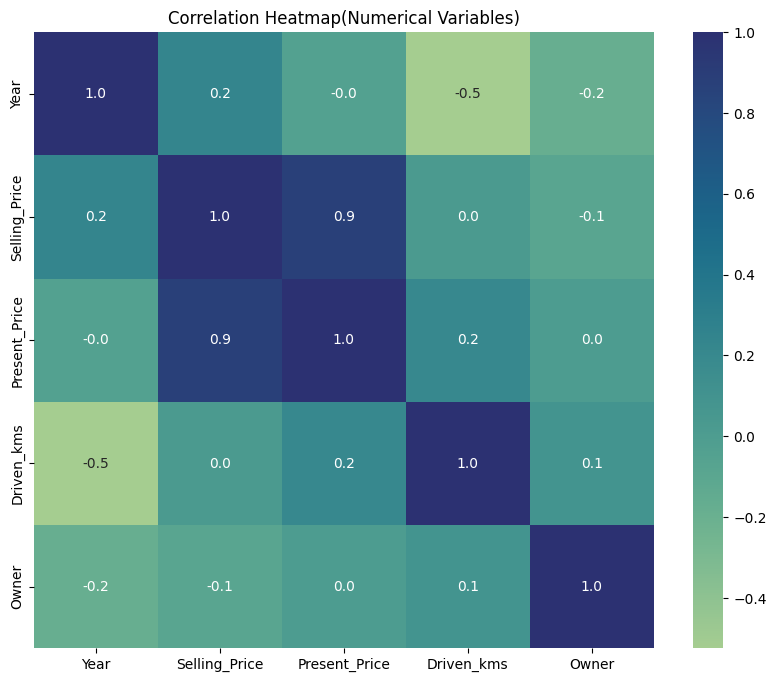

In [47]:
# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".1f")
plt.title('Correlation Heatmap(Numerical Variables)')
plt.show()

**Findings:**

**Strong Positive Correlation:** 

Selling Price and Present Price show a highly positive correlation, implying a nearly perfect linear connection. This finding aligns with the fact that the present market value strongly influences the selling price.

**Influence of Year:** 

Year exhibits a weak/negative correlation with Selling Price, Present Price, and Driven_kms. Newer Cars(with lower Year values) generally have higher selling prices, lower present prices and fewer driven kilometers.

**Importance of Driven-kms**

Driven-kms shows a weak/negative correlation with Selling Price and Present Price. Cars with lower driven_kms typically sell for higher prices.

Distribution of Numerical Features

<Figure size 1000x800 with 0 Axes>

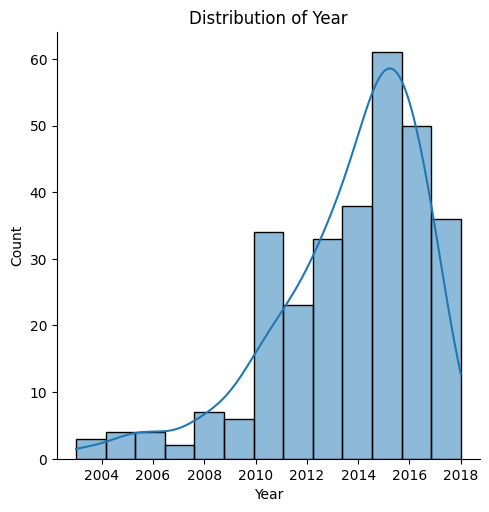

<Figure size 1000x800 with 0 Axes>

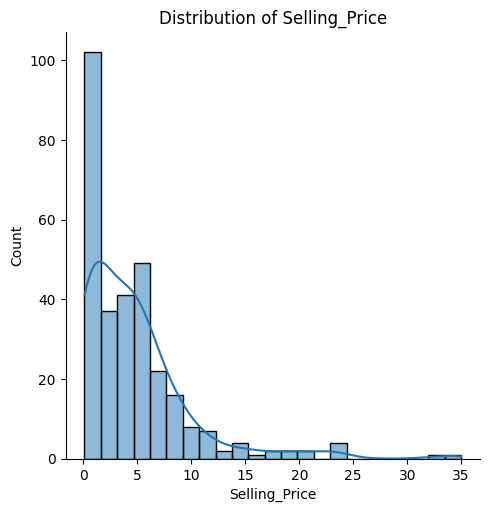

<Figure size 1000x800 with 0 Axes>

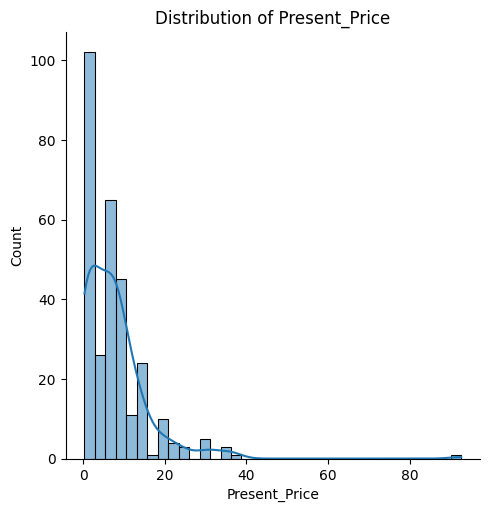

<Figure size 1000x800 with 0 Axes>

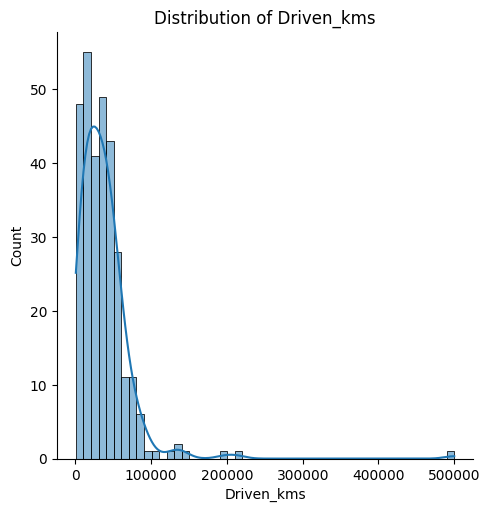

In [48]:
numerical_features = ['Year','Selling_Price','Present_Price','Driven_kms']
for feature in numerical_features:
    plt.figure(figsize=(10,8))
    sns.displot(data=df, x= feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show

Scatter Plots

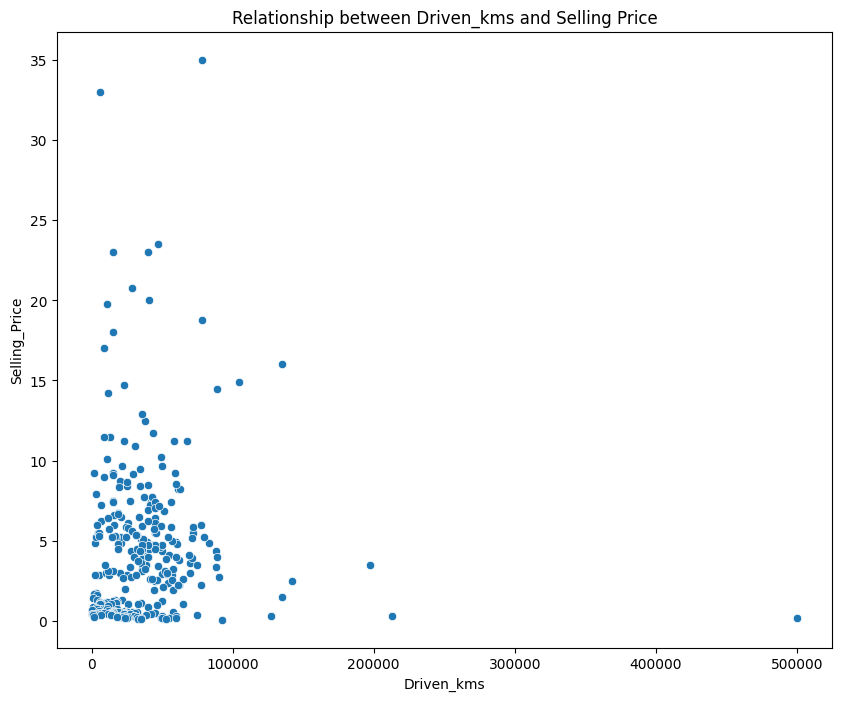

In [50]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'Driven_kms', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling Price')
plt.xlabel('Driven kms')
plt.ylabel('Selling Price')
plt.show()

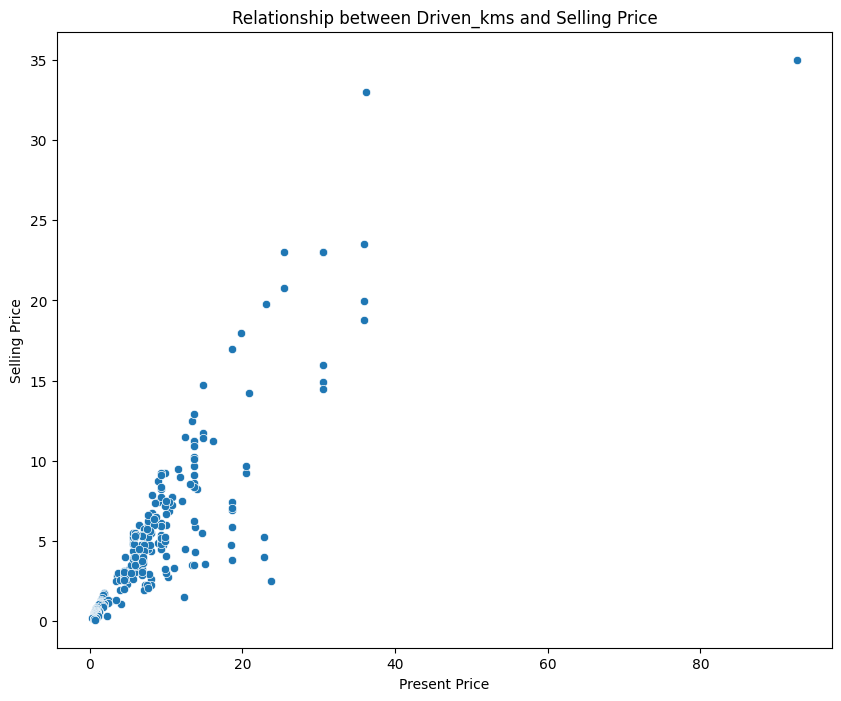

In [51]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= 'Present_Price', y='Selling_Price', data=df)
plt.title('Relationship between Driven_kms and Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

**Findings:**

The data indicates a robust positive correlation between Present Price and Selling Price. Vehicles with a higher present market value tend to fetch higher selling prices.

### Data Cleaning

In [52]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [53]:
print(df['Selling_type'].value_counts())

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [54]:
print(df['Transmission'].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [55]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [56]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Prediction

In [57]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [58]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [59]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [61]:
# split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=22)

In [68]:
# train linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
y_hat = model.predict(x_test)

r2 = r2_score(y_test, y_hat)
print('R-squared:',r2)


R-squared: 0.6377079130706682


In [71]:
# make predictions for a new car(not in training or testing set)
new_car = [[2024, 10, 12000, 0, 0, 0, 0 ]]
predicted_price = model.predict(new_car)
print('Predicted Selling Price: ', predicted_price[0])

Predicted Selling Price:  9.46301234093221
